# Humam Activity Detection 

## 1 : Import Libraries 

In [92]:
# Importing Libraries 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 

In [93]:
# Models and Utils 
# Utils
from sklearn.utils import resample
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler , StandardScaler
from sklearn.model_selection import train_test_split , GridSearchCV 

# Models 
from sklearn.linear_model import LogisticRegression 
from sklearn.linear_model import Lasso 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC 
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import statsmodels.api as sm 

# Evaluation Metrics 
from sklearn.metrics import classification_report  

## 2 : Data Importing and Analysis 

In [94]:
# Loading Data 
df = pd.read_csv("/kaggle/input/mobile-health/mhealth_raw_data.csv")
df.head()

alx     aly      alz       glx      gly      glz     arx     ary  \
0  2.1849 -9.6967  0.63077  0.103900 -0.84053 -0.68762 -8.6499 -4.5781   
1  2.3876 -9.5080  0.68389  0.085343 -0.83865 -0.68369 -8.6275 -4.3198   
2  2.4086 -9.5674  0.68113  0.085343 -0.83865 -0.68369 -8.5055 -4.2772   
3  2.1814 -9.4301  0.55031  0.085343 -0.83865 -0.68369 -8.6279 -4.3163   
4  2.4173 -9.3889  0.71098  0.085343 -0.83865 -0.68369 -8.7008 -4.1459   

        arz      grx     gry       grz  Activity   subject  
0  0.187760 -0.44902 -1.0103  0.034483         0  subject1  
1  0.023595 -0.44902 -1.0103  0.034483         0  subject1  
2  0.275720 -0.44902 -1.0103  0.034483         0  subject1  
3  0.367520 -0.45686 -1.0082  0.025862         0  subject1  
4  0.407290 -0.45686 -1.0082  0.025862         0  subject1

In [95]:
# Info 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1215745 entries, 0 to 1215744
Data columns (total 14 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   alx       1215745 non-null  float64
 1   aly       1215745 non-null  float64
 2   alz       1215745 non-null  float64
 3   glx       1215745 non-null  float64
 4   gly       1215745 non-null  float64
 5   glz       1215745 non-null  float64
 6   arx       1215745 non-null  float64
 7   ary       1215745 non-null  float64
 8   arz       1215745 non-null  float64
 9   grx       1215745 non-null  float64
 10  gry       1215745 non-null  float64
 11  grz       1215745 non-null  float64
 12  Activity  1215745 non-null  int64  
 13  subject   1215745 non-null  object 
dtypes: float64(12), int64(1), object(1)
memory usage: 129.9+ MB


In [96]:
# Statistical Summary of  Numerical Columns
df.describe().T

count      mean       std      min       25%       50%  \
alx       1215745.0  1.494200  3.826485 -22.1460   0.14131  1.308900   
aly       1215745.0 -9.692878  4.171303 -19.6190 -10.20100 -9.670300   
alz       1215745.0 -0.954806  5.461803 -19.3730  -2.64940 -0.016456   
glx       1215745.0 -0.001599  0.491217  -2.1466  -0.43599 -0.014842   
gly       1215745.0 -0.616632  0.354641  -7.7899  -0.81801 -0.707320   
glz       1215745.0 -0.158781  0.546798  -2.6267  -0.59332 -0.190570   
arx       1215745.0 -3.713413  4.763586 -22.3610  -6.07600 -2.977600   
ary       1215745.0 -5.805526  5.757639 -18.9720  -9.40420 -7.461500   
arz       1215745.0  2.393880  3.876503 -18.2390   0.12965  1.928100   
grx       1215745.0 -0.276106  0.527689  -8.3392  -0.70588 -0.354900   
gry       1215745.0 -0.466434  0.555551  -3.5708  -0.89733 -0.634500   
grz       1215745.0  0.266633  0.564380  -2.6897  -0.23707  0.301720   
Activity  1215745.0  1.741465  3.283679   0.0000   0.00000  0.000000   

               75%      max  
alx       2.575800  20.0540  
aly      -9.042200  21.1610  
alz       1.301300  25.0150  
glx       0.448980  60.4840  
gly      -0.540340   2.0113  
glz       0.322200   2.7701  
arx      -1.193700  19.8640  
ary      -2.533900  22.1910  
arz       4.914700  25.7410  
grx       0.096078   3.3196  
gry      -0.106780   1.5565  
grz       0.778020   2.7500  
Activity  2.000000  12.0000

In [97]:
# Checking Null values 
df.isna().sum()

alx         0
aly         0
alz         0
glx         0
gly         0
glz         0
arx         0
ary         0
arz         0
grx         0
gry         0
grz         0
Activity    0
subject     0
dtype: int64

In [98]:
# Checking for duplicates 
df.duplicated().sum()

0

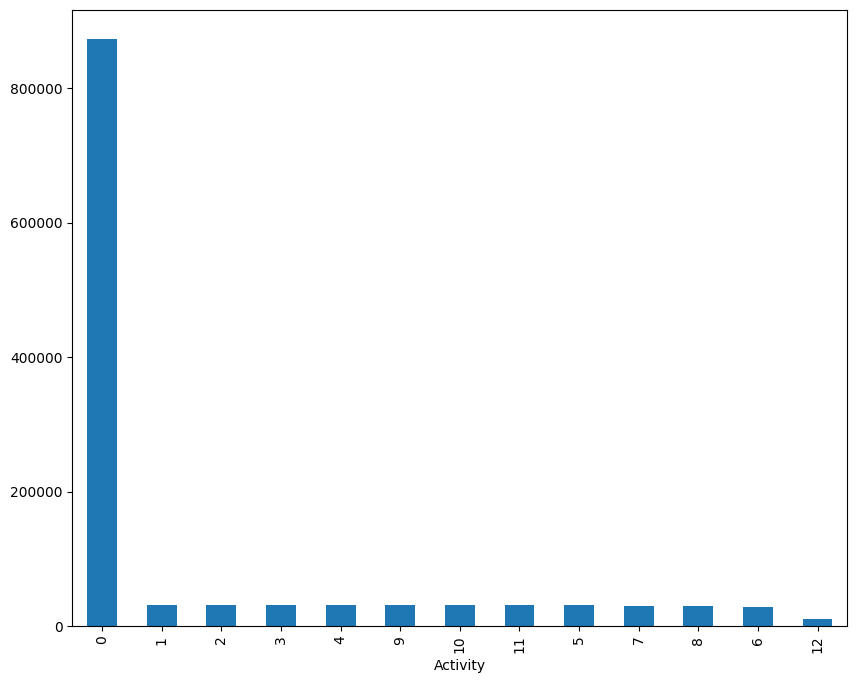

In [99]:
# Distribution Plot :  Activity 
plt.figure(figsize = (10 , 8))
df["Activity"].value_counts().plot.bar()
plt.show()

In [100]:
#As the activity higher is for 0 
data_activity_0 = df[df["Activity"] == 0]
data_activity_else = df[df["Activity"] != 0]

In [101]:
# sampling the data / adjusting 0 for other activities 
data_activity_0 = data_activity_0.sample(n = 40000)
df =  pd.concat([data_activity_0, data_activity_else])

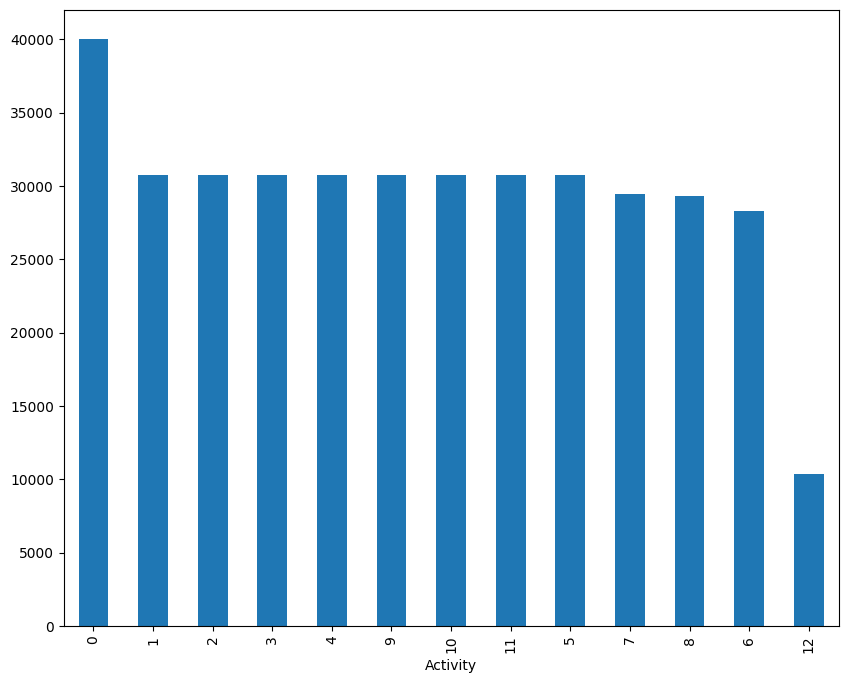

In [102]:
# Distribution Again 
plt.figure(figsize = (10 , 8))
df["Activity"].value_counts().plot.bar()
plt.show()

In [103]:
len(df)

383195

## 3 : EDA 

In [104]:
# Purpose : For Visual analysis
activity_label = {
    0: "None",
    1: "Standing still (1 min)",
    2: "Sitting and relaxing (1 min)",
    3: "Lying down (1 min)",
    4: "Walking (1 min)",
    5: "Climbing stairs (1 min)",
    6: "Waist bends forward (20x)",
    7: "Frontal elevation of arms (20x)",
    8: "Knees bending (crouching) (20x)",
    9: "Cycling (1 min)",
    10: "Jogging (1 min)",
    11: "Running (1 min)",
    12: "Jump front & back (20x)"
}

=====================Standing still (1 min) - a==========


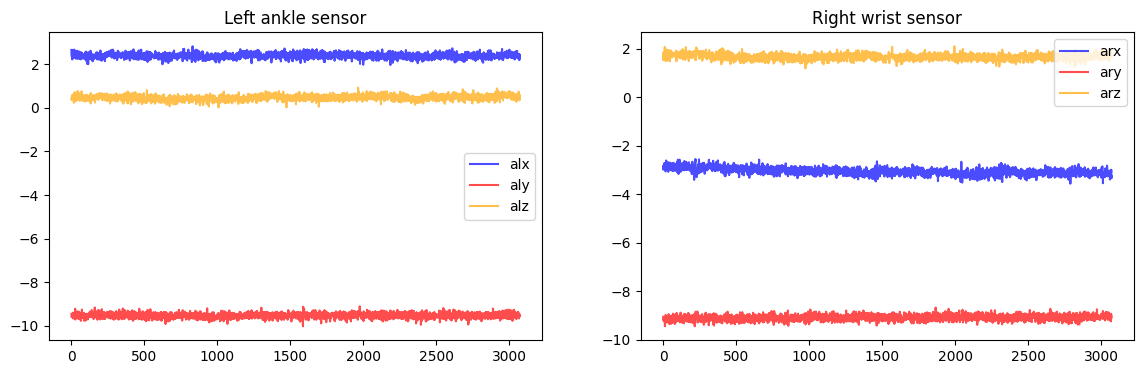

=====================Standing still (1 min) - g==========


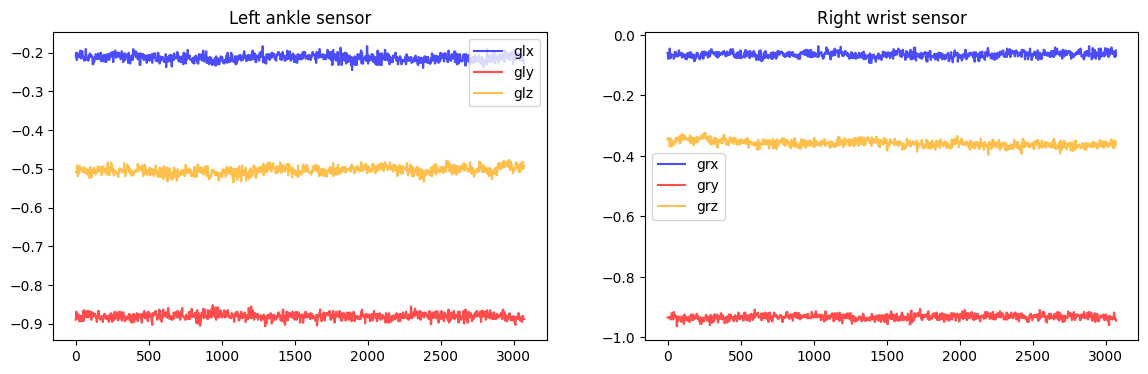

=====================Sitting and relaxing (1 min) - a==========


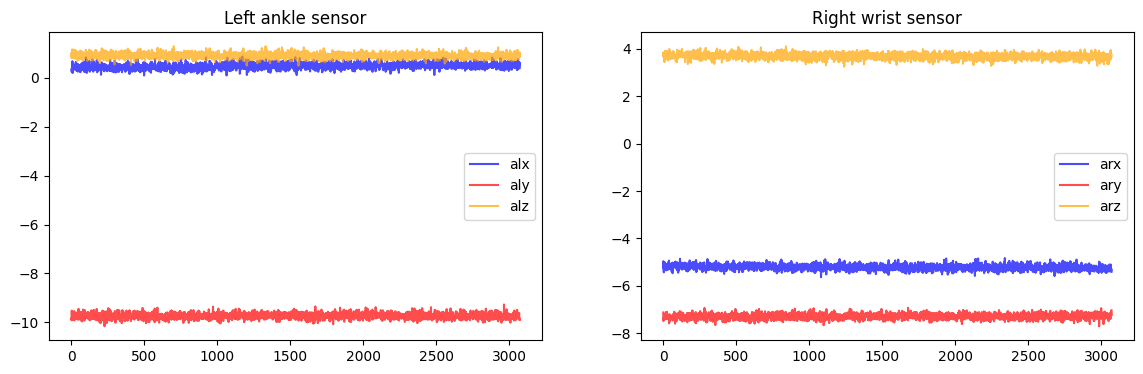

=====================Sitting and relaxing (1 min) - g==========


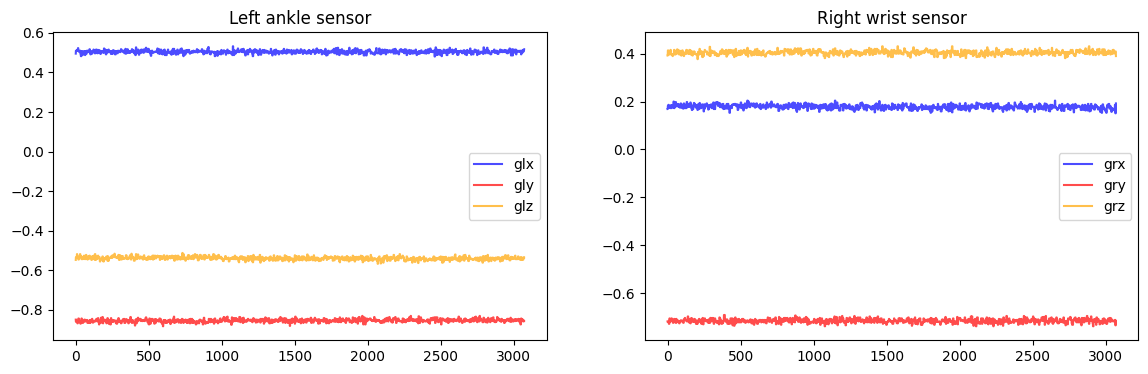

=====================Lying down (1 min) - a==========


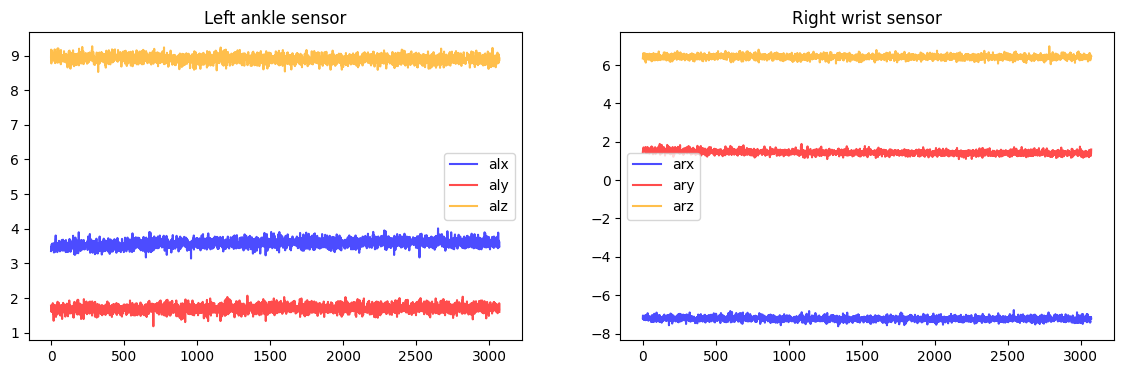

=====================Lying down (1 min) - g==========


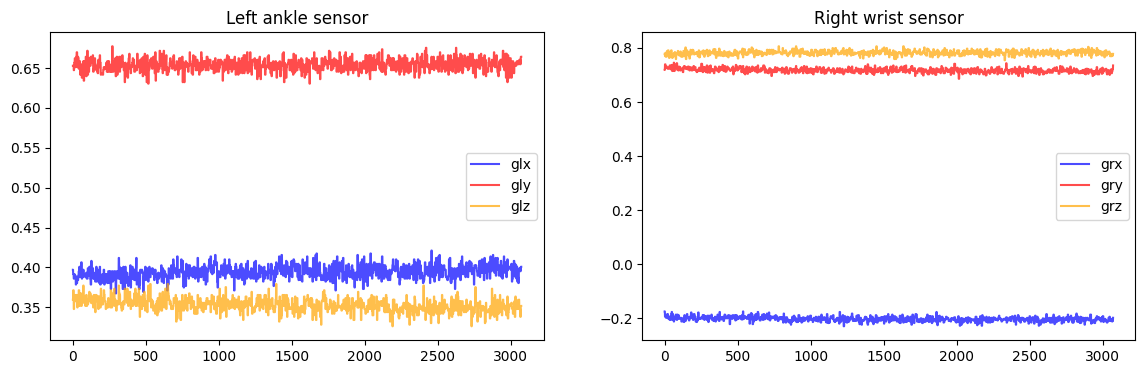

=====================Walking (1 min) - a==========


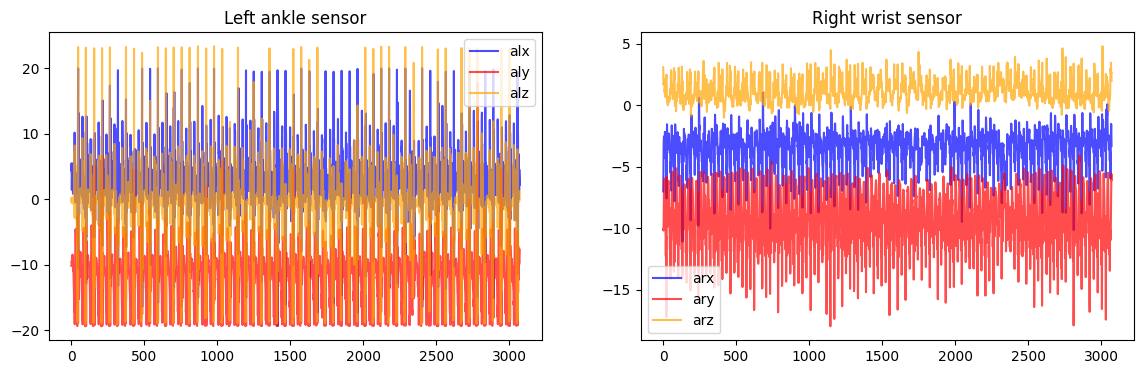

=====================Walking (1 min) - g==========


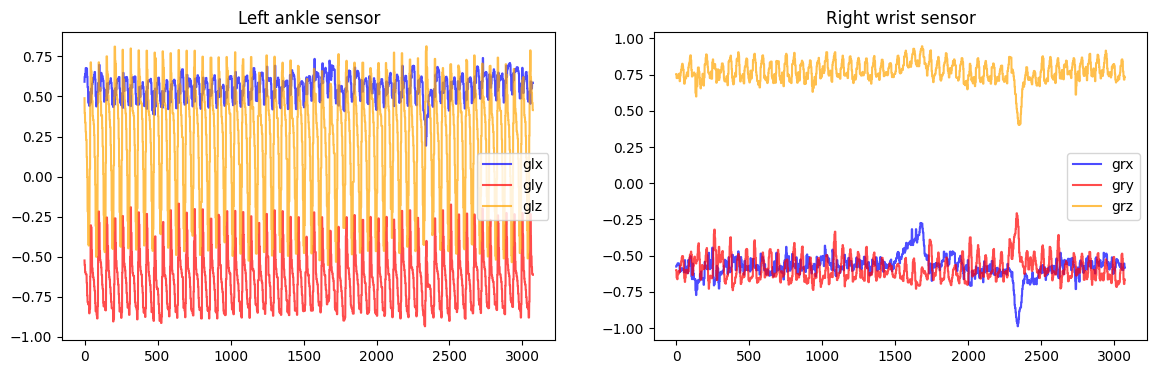

=====================Climbing stairs (1 min) - a==========


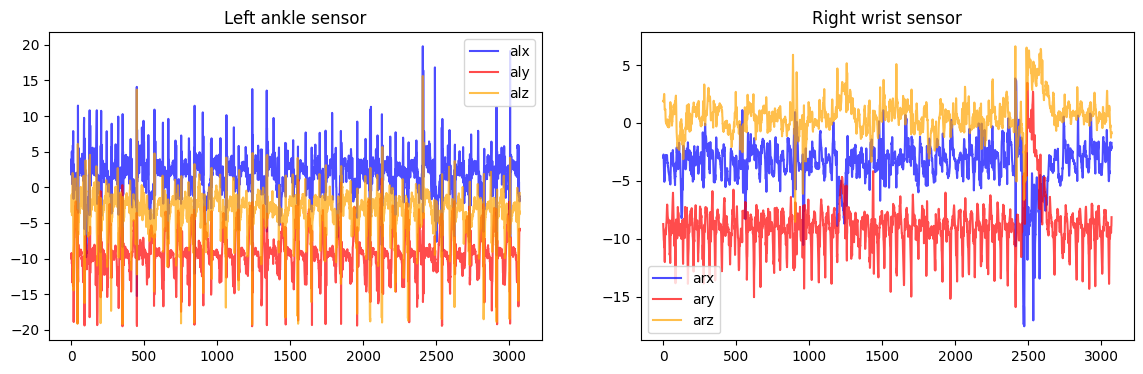

=====================Climbing stairs (1 min) - g==========


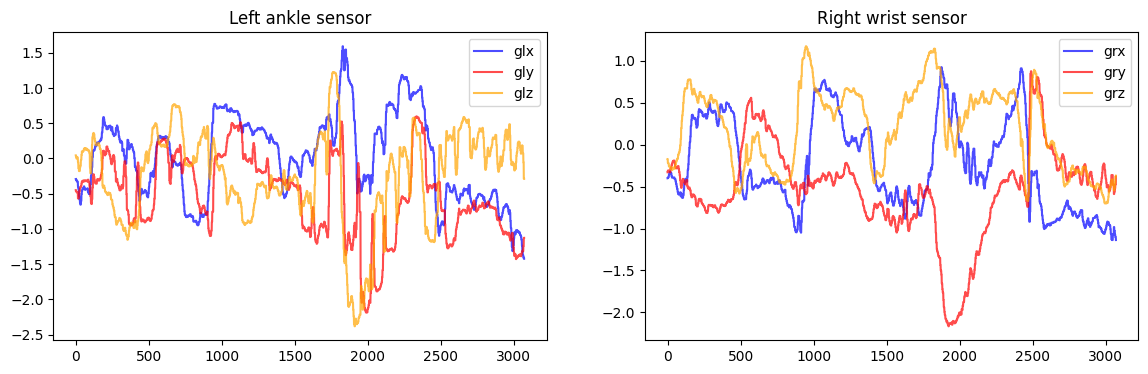

=====================Waist bends forward (20x) - a==========


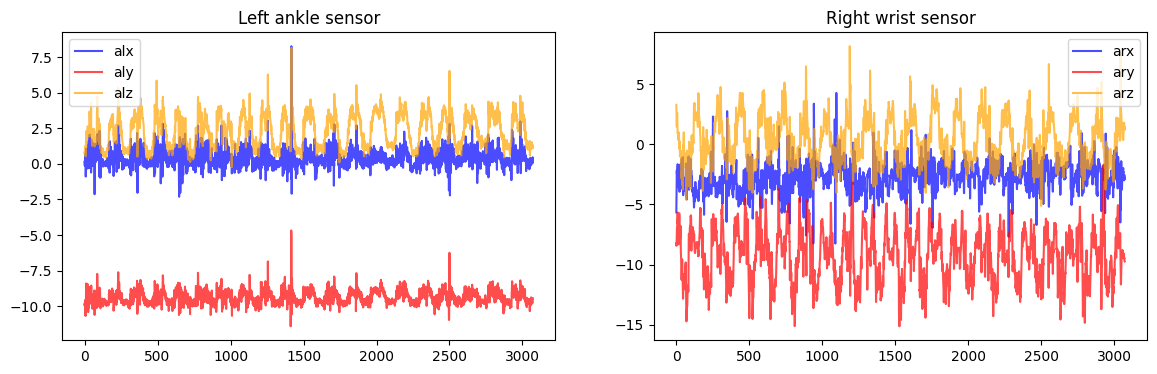

=====================Waist bends forward (20x) - g==========


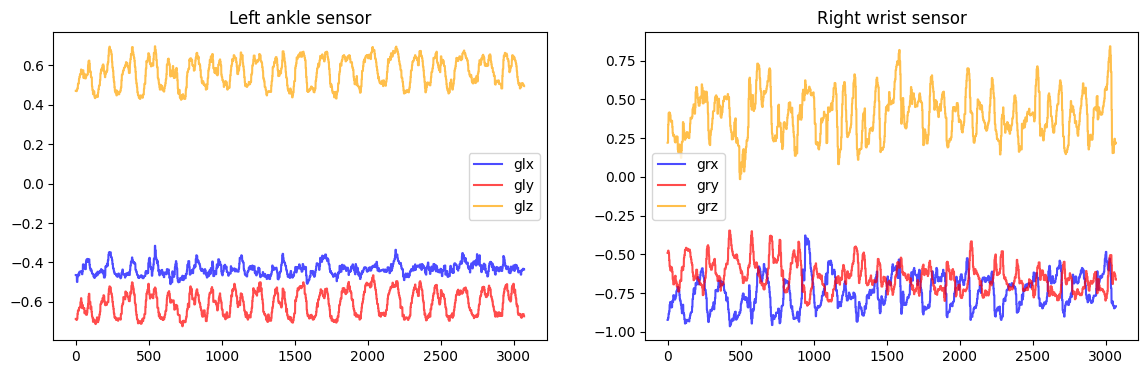

=====================Frontal elevation of arms (20x) - a==========


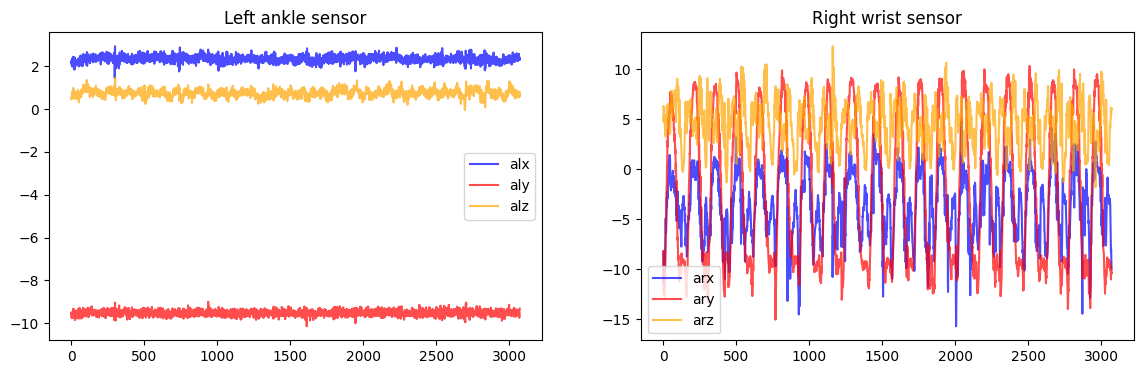

=====================Frontal elevation of arms (20x) - g==========


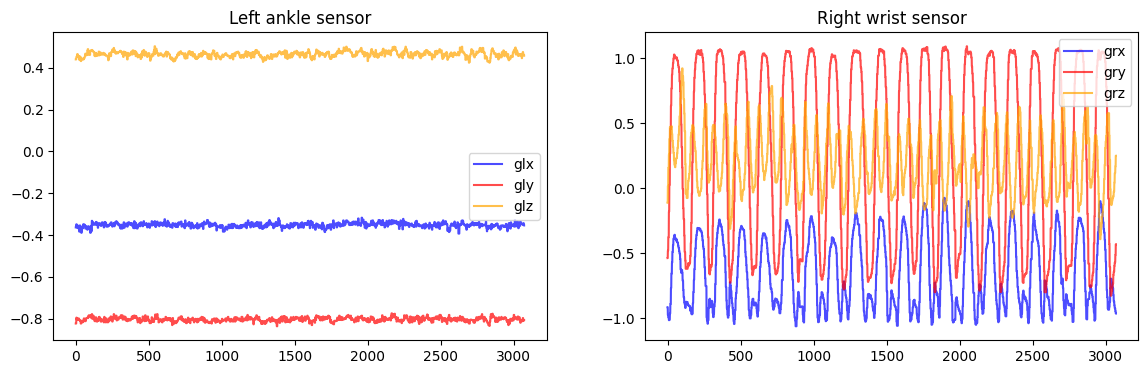

=====================Knees bending (crouching) (20x) - a==========


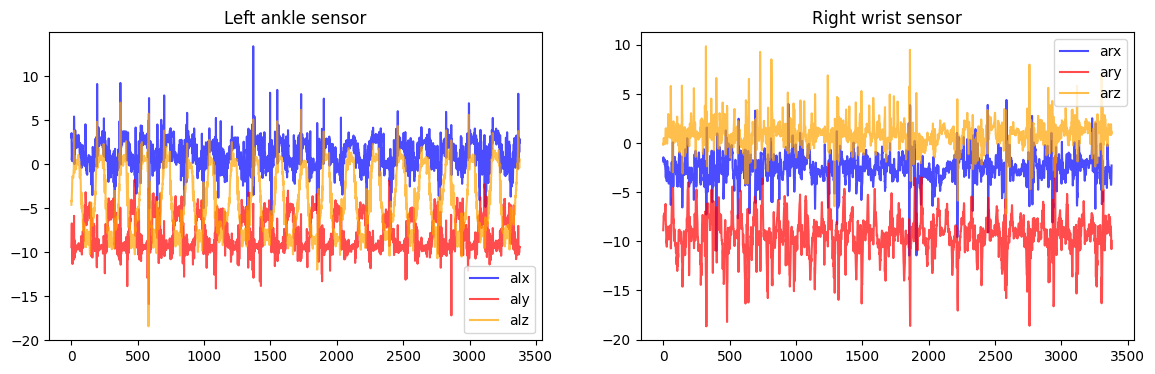

=====================Knees bending (crouching) (20x) - g==========


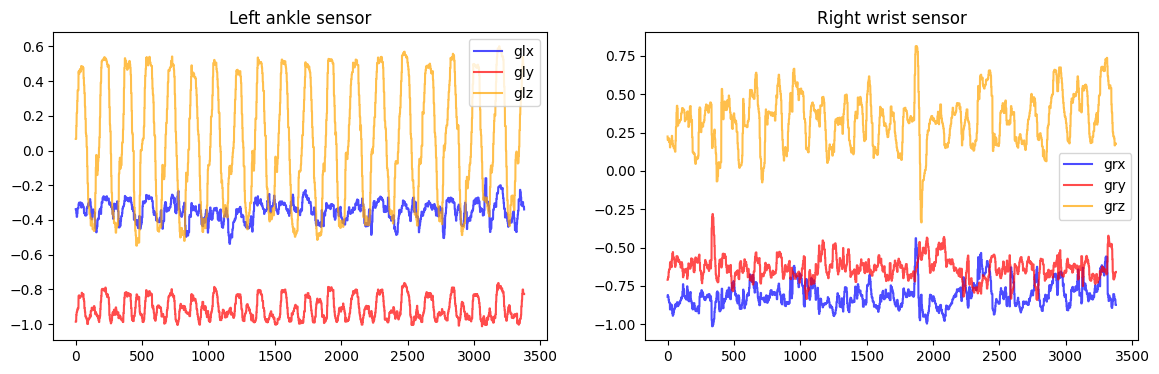

=====================Cycling (1 min) - a==========


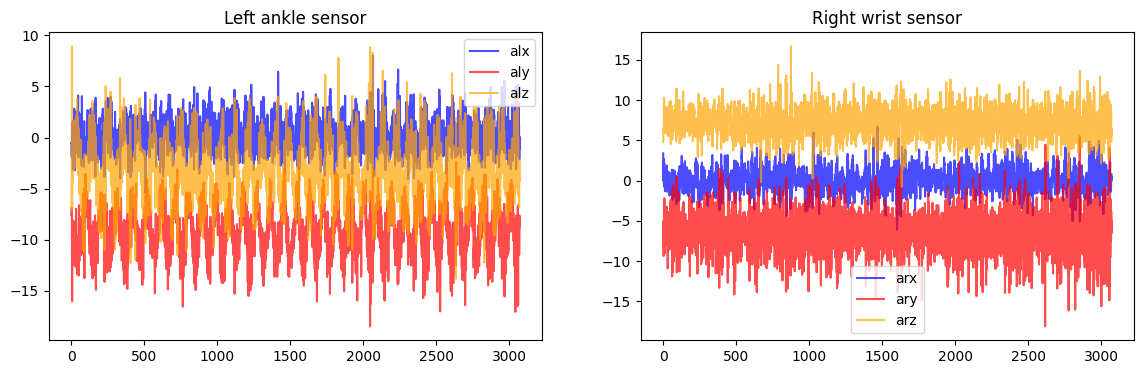

=====================Cycling (1 min) - g==========


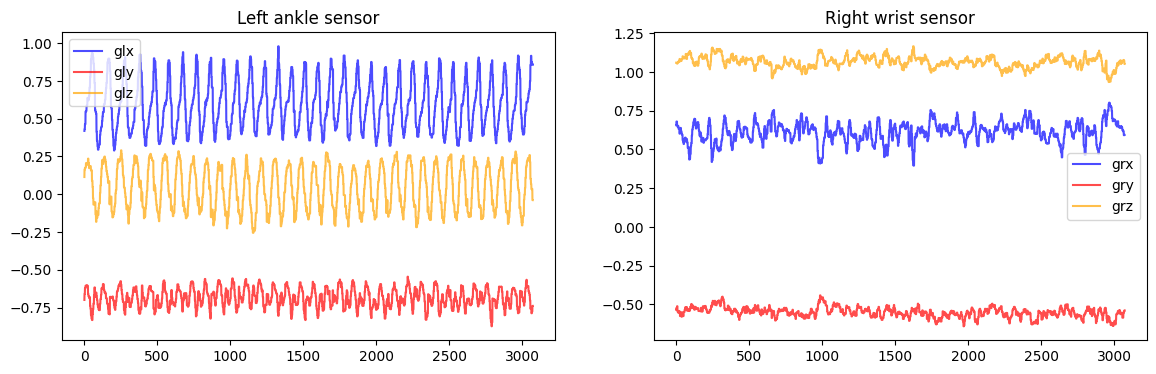

=====================Jogging (1 min) - a==========


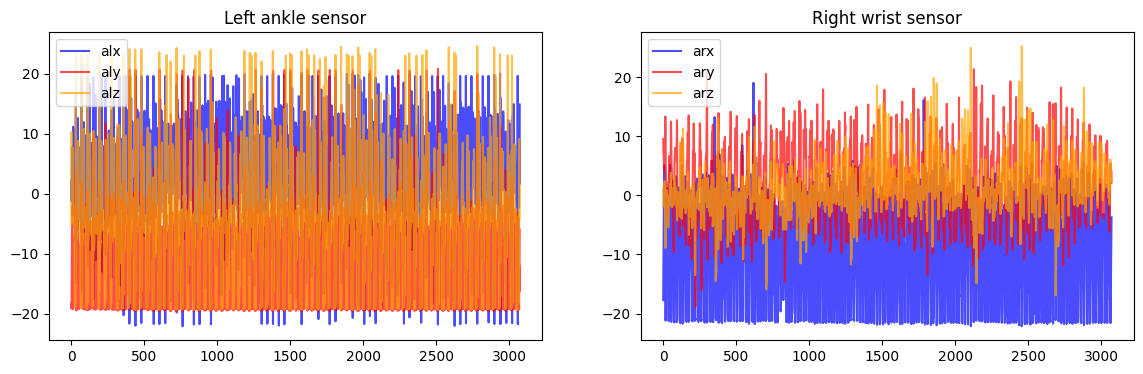

=====================Jogging (1 min) - g==========


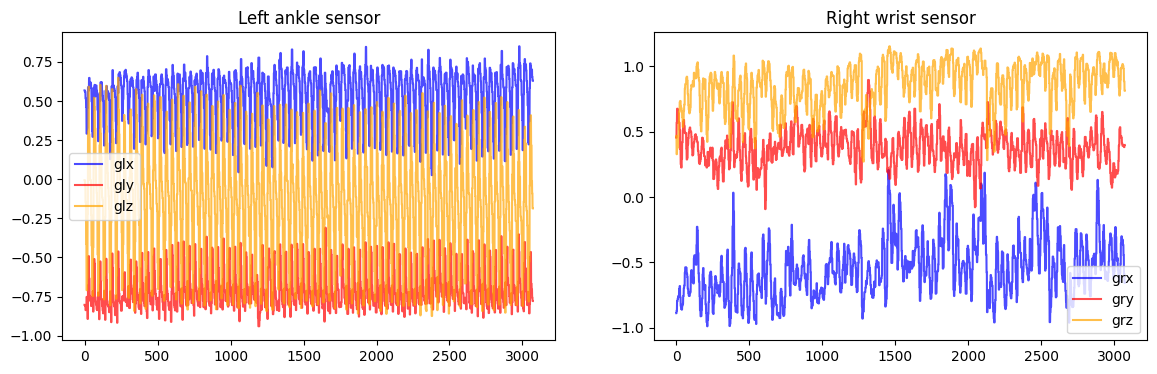

=====================Running (1 min) - a==========


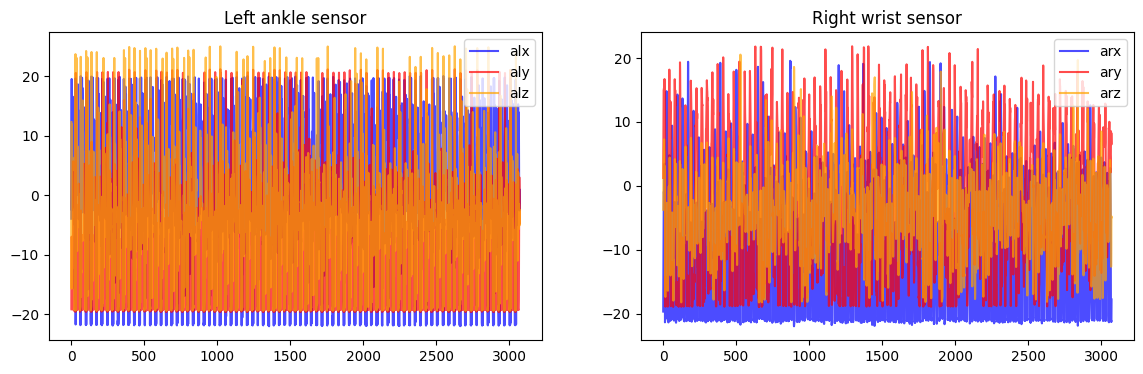

=====================Running (1 min) - g==========


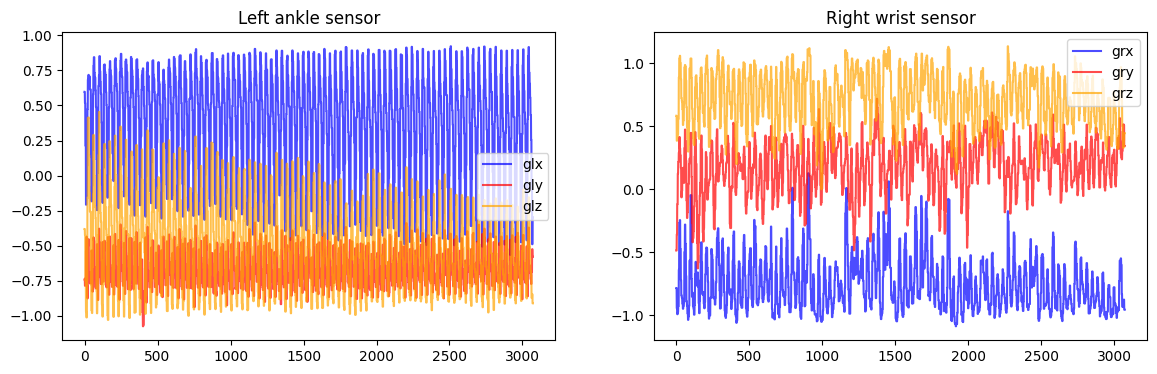

=====================Jump front & back (20x) - a==========


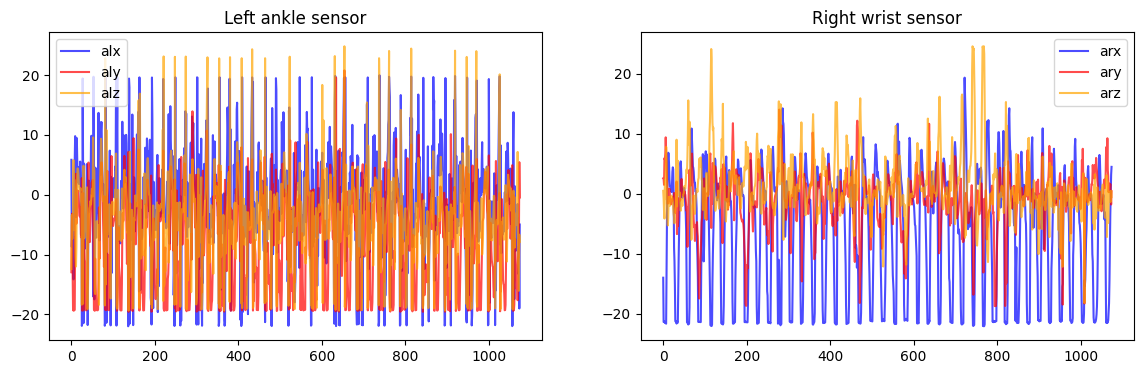

=====================Jump front & back (20x) - g==========


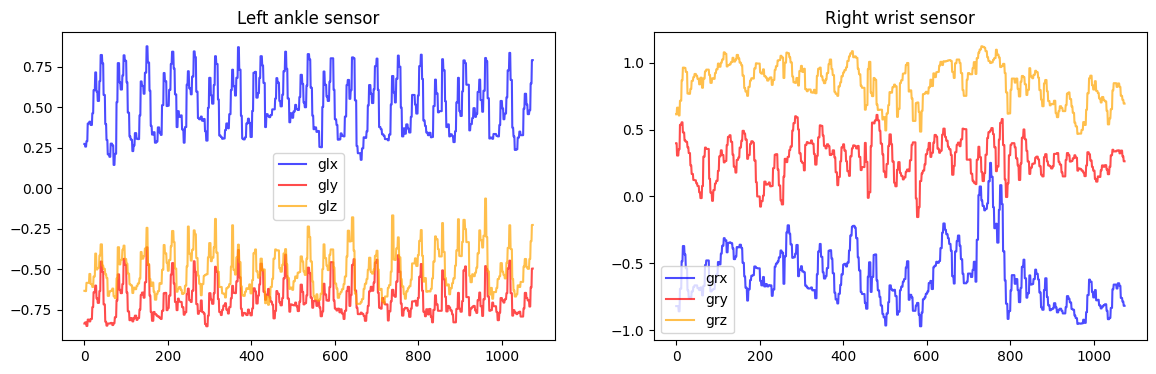

In [105]:
# Plotting
subject1 = df[df['subject'] == 'subject1']
readings = ['a', 'g']

for i in range(1,13):
    for r in readings:
        print(f"====================={activity_label[i]} - {r}==========")
        plt.figure(figsize = (14,4))
        # Left ankle
        plt.subplot(1,2,1)
        plt.plot(subject1[subject1['Activity'] == i].reset_index(drop=True)[r + "lx"], color='blue', alpha=0.7, label=r + "lx")
        plt.plot(subject1[subject1['Activity'] == i].reset_index(drop=True)[r + "ly"], color='red', alpha=0.7, label=r + "ly")
        plt.plot(subject1[subject1['Activity'] == i].reset_index(drop=True)[r + "lz"], color='orange', alpha=0.7, label=r + "lz")
        plt.title("Left ankle sensor")
        plt.legend()
        
        # Right ankle
        plt.subplot(1,2,2)
        plt.plot(subject1[subject1['Activity'] == i].reset_index(drop=True) [r + "rx"], color = 'blue', alpha = 0.7, label = r + "rx")
        plt.plot(subject1[subject1['Activity'] == i].reset_index(drop=True) [r + "ry"], color='red', alpha=0.7, label = r + "ry")
        plt.plot(subject1[subject1['Activity'] == i].reset_index(drop=True) [r + "rz"], color = 'orange', alpha= 0.7, label = r + "rz")
        plt.title("Right wrist sensor")
        plt.legend()
        plt.show()


=====================Standing still (1 min) - a==========


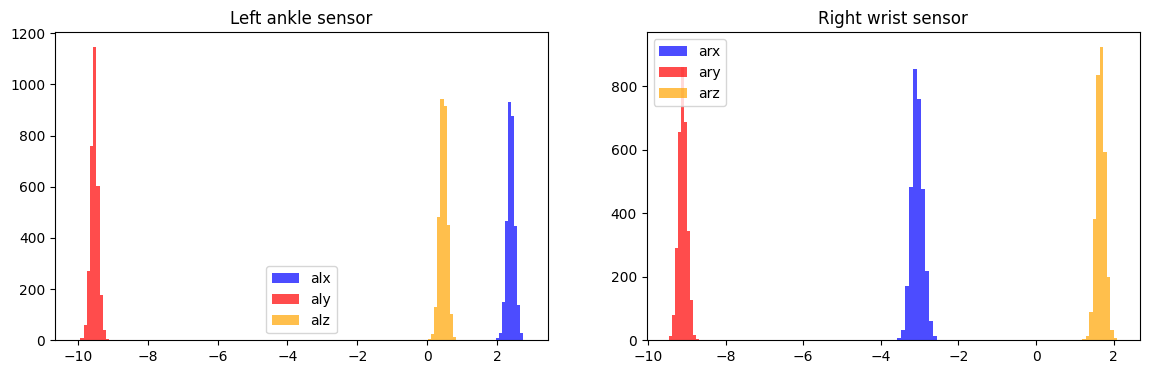

=====================Standing still (1 min) - g==========


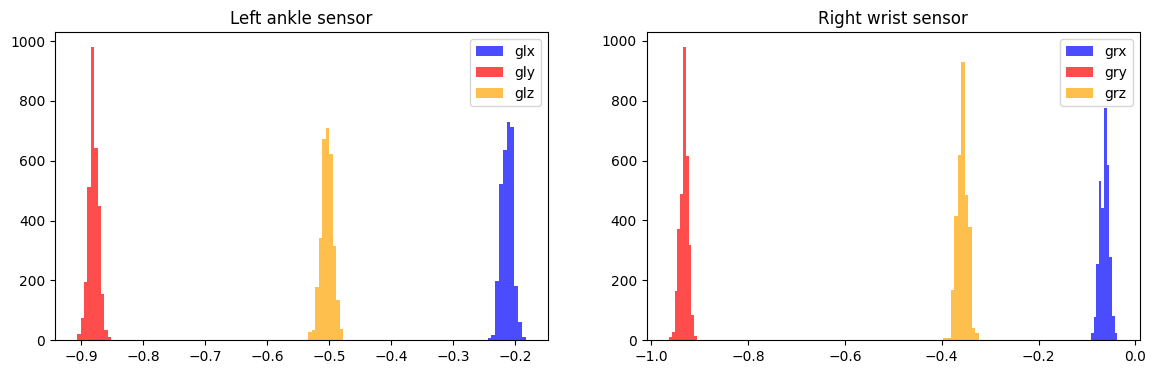

=====================Sitting and relaxing (1 min) - a==========


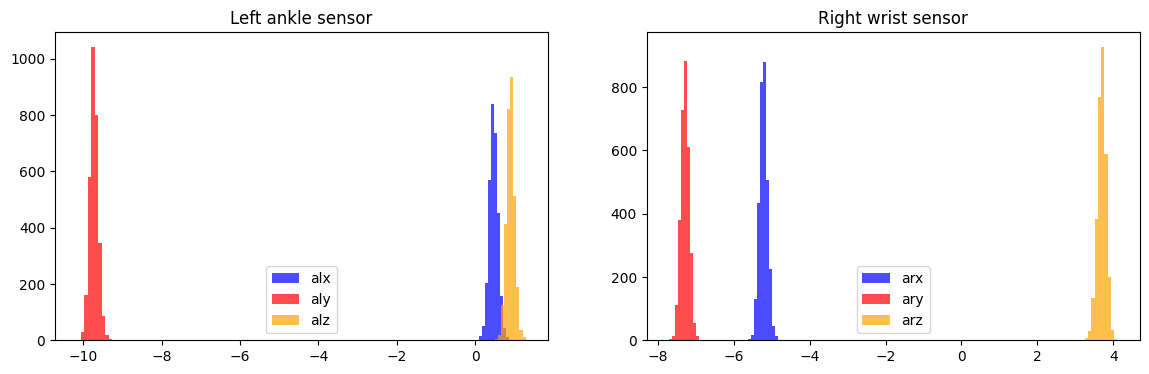

=====================Sitting and relaxing (1 min) - g==========


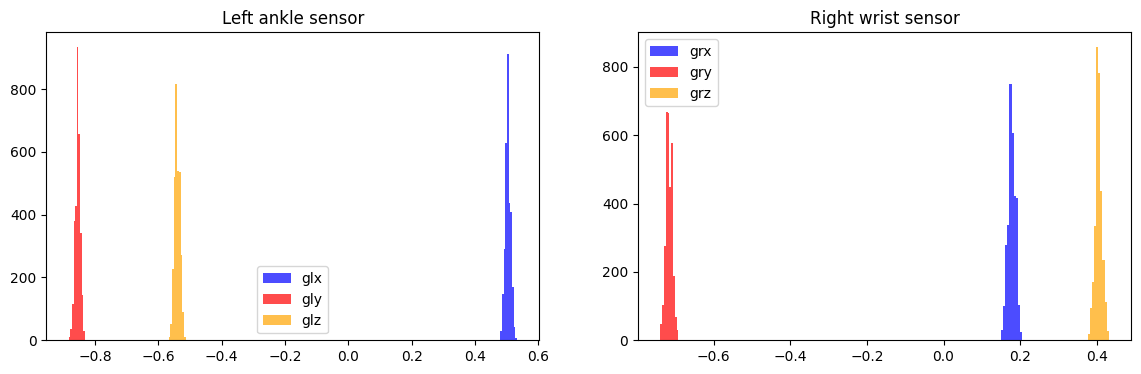

=====================Lying down (1 min) - a==========


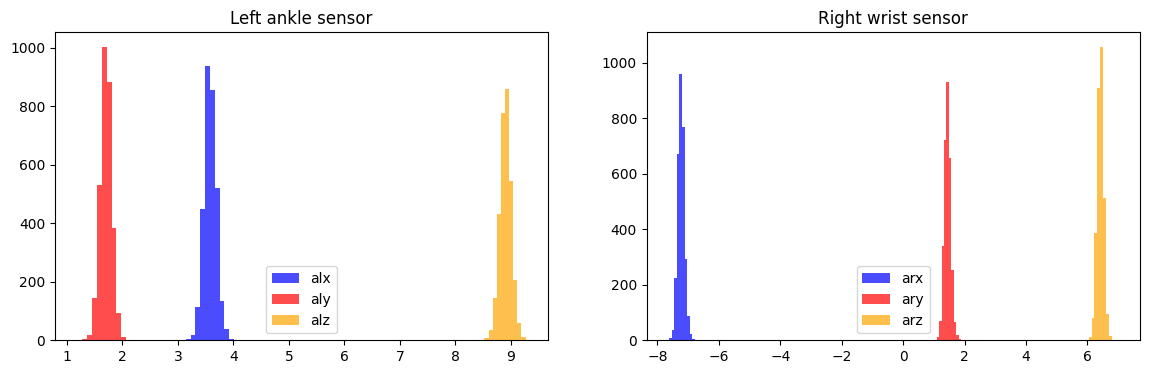

=====================Lying down (1 min) - g==========


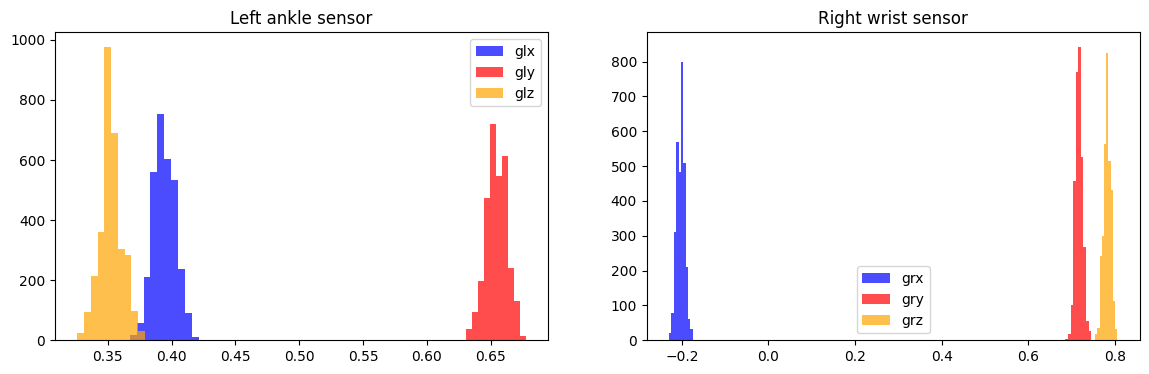

=====================Walking (1 min) - a==========


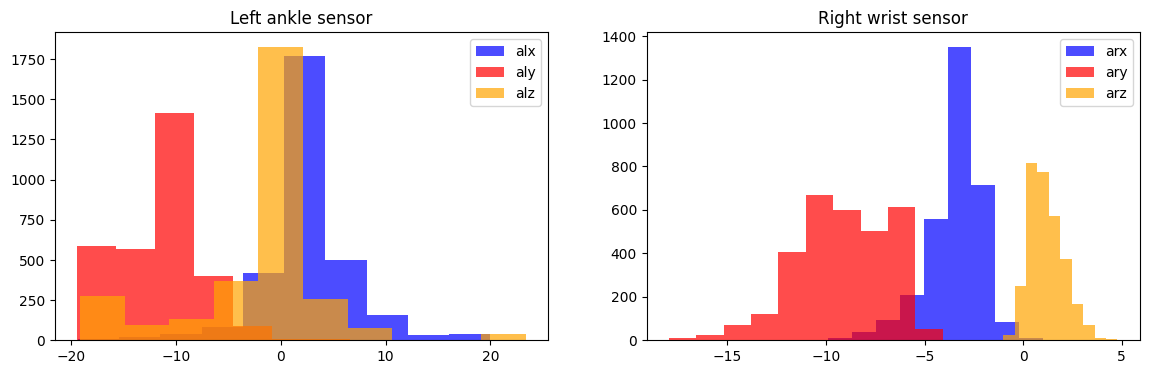

=====================Walking (1 min) - g==========


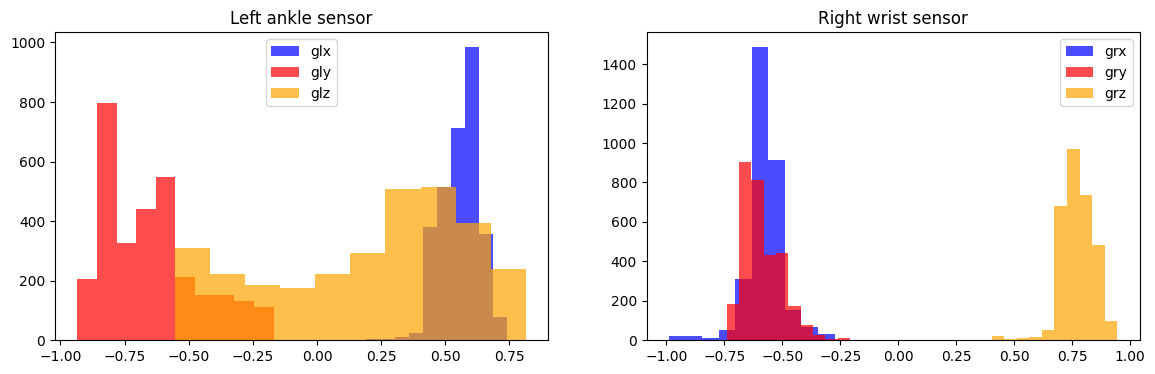

=====================Climbing stairs (1 min) - a==========


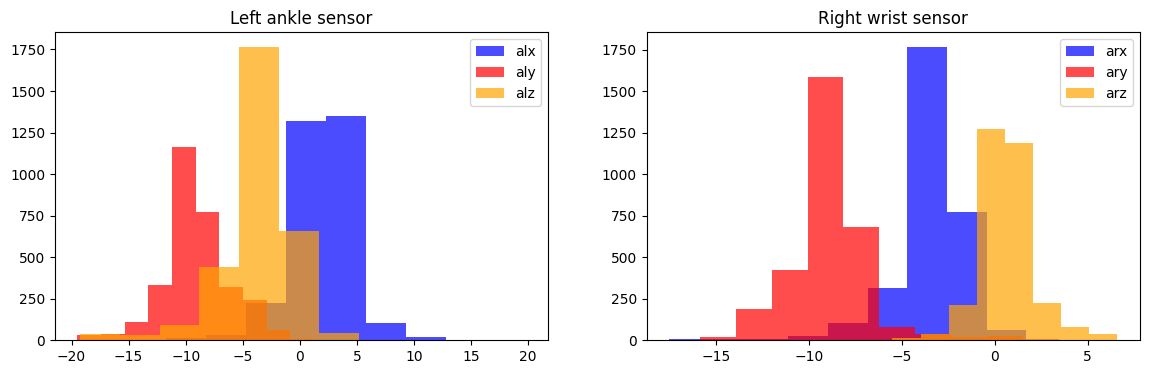

=====================Climbing stairs (1 min) - g==========


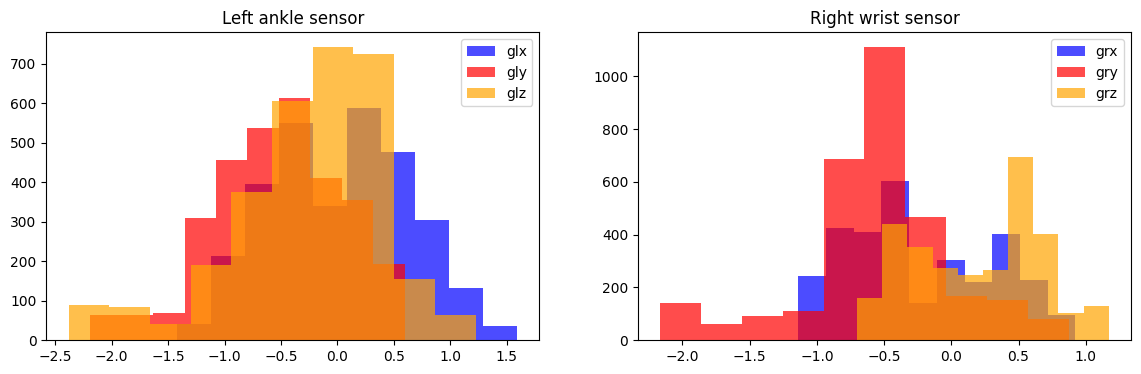

=====================Waist bends forward (20x) - a==========


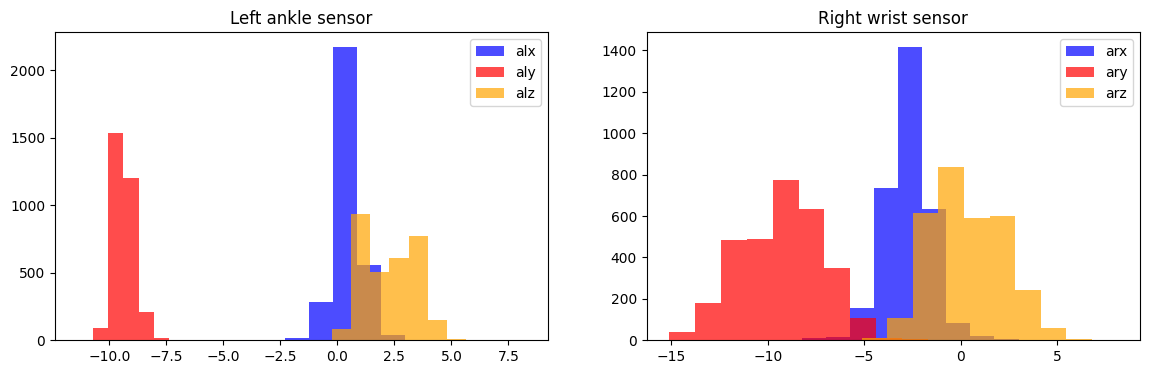

=====================Waist bends forward (20x) - g==========


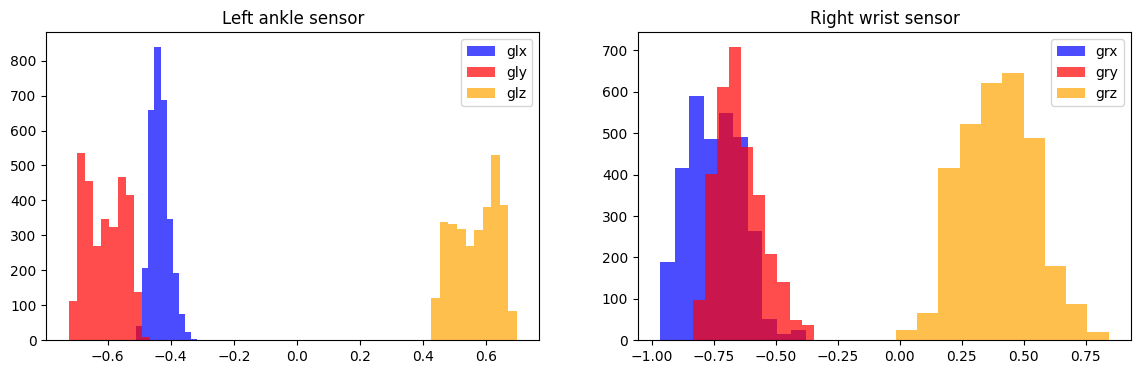

=====================Frontal elevation of arms (20x) - a==========


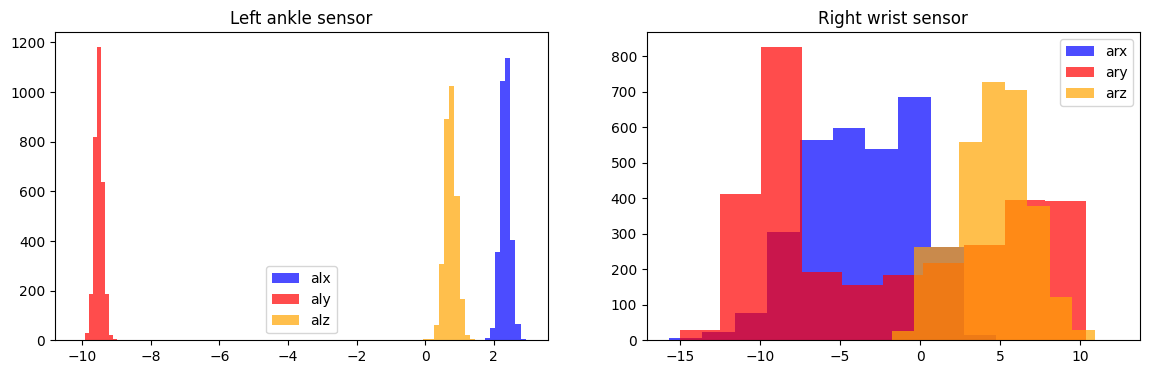

=====================Frontal elevation of arms (20x) - g==========


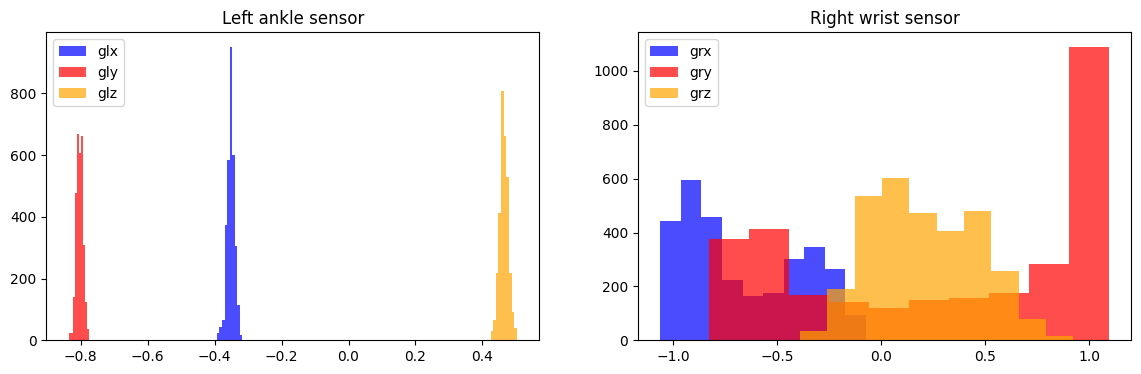

=====================Knees bending (crouching) (20x) - a==========


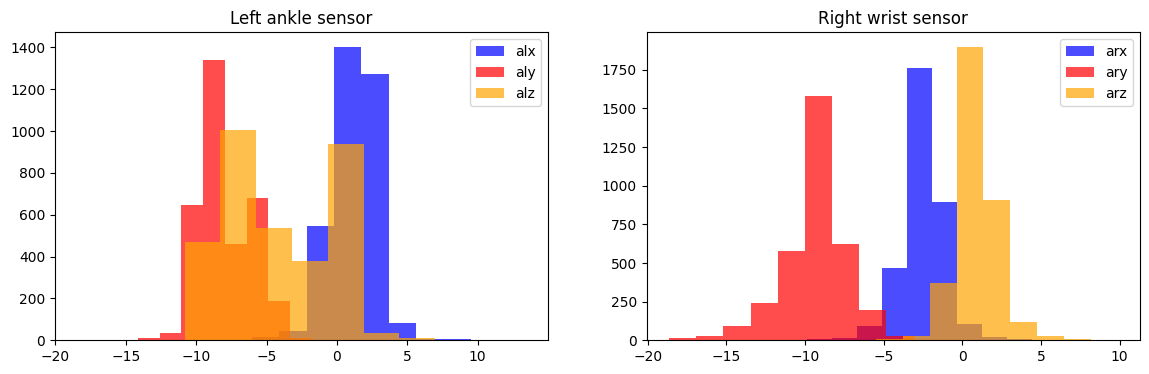

=====================Knees bending (crouching) (20x) - g==========


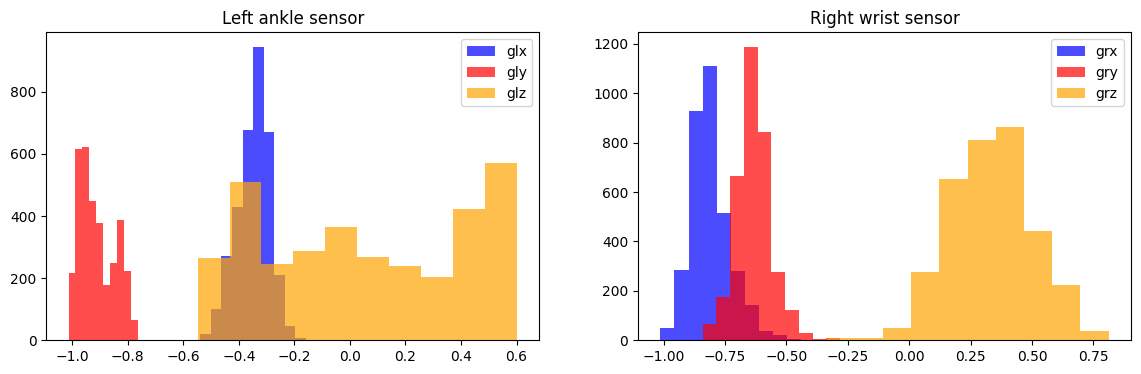

=====================Cycling (1 min) - a==========


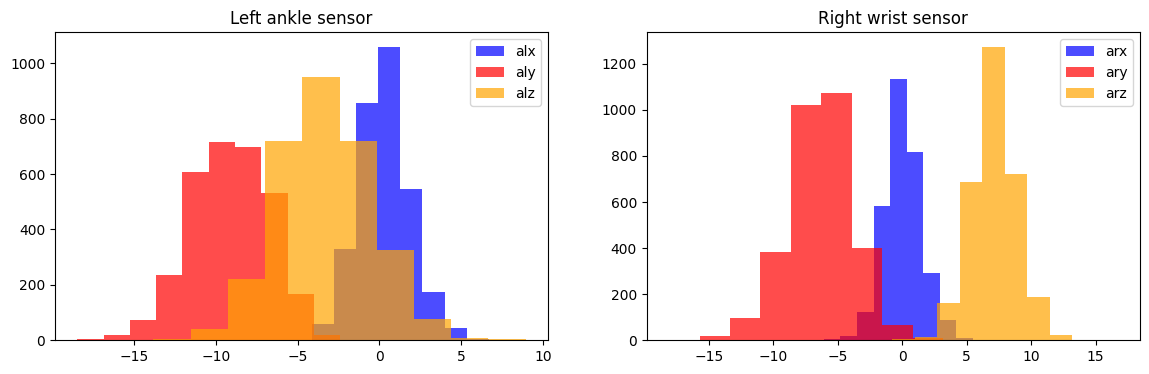

=====================Cycling (1 min) - g==========


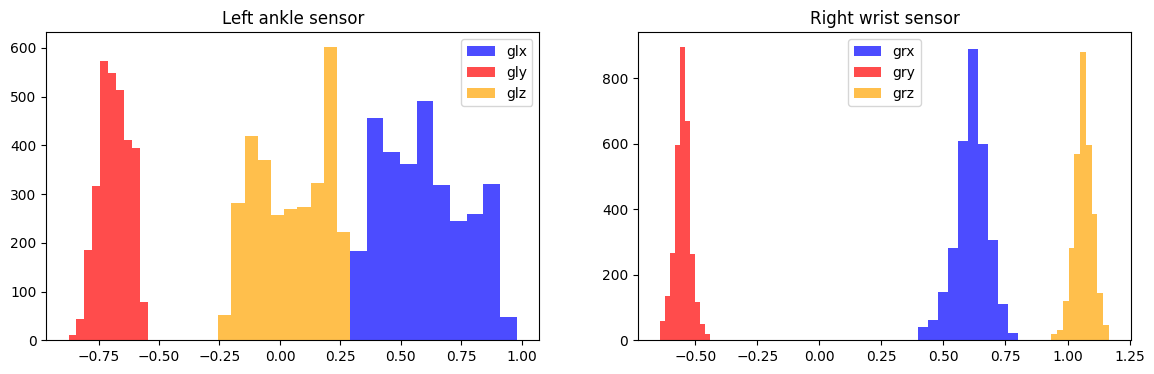

=====================Jogging (1 min) - a==========


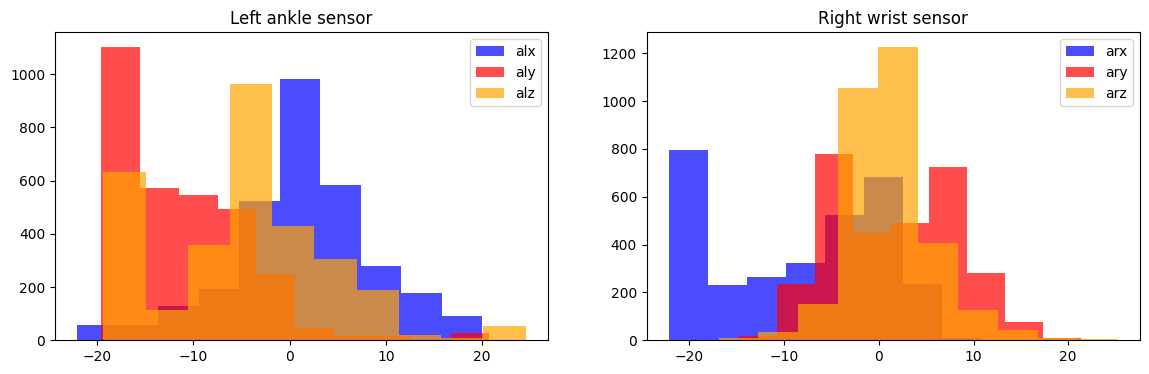

=====================Jogging (1 min) - g==========


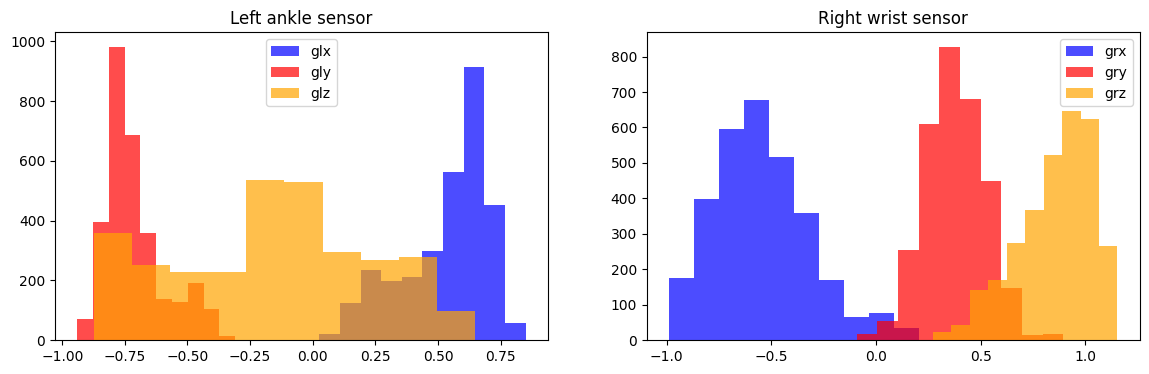

=====================Running (1 min) - a==========


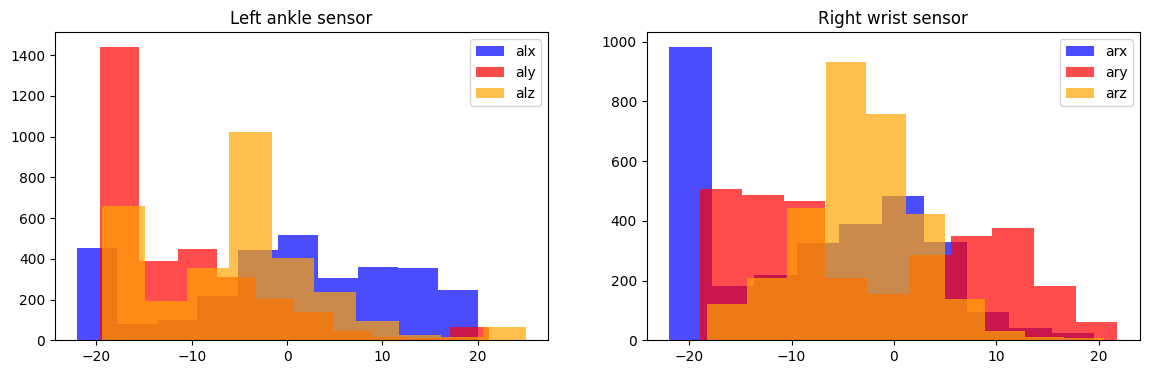

=====================Running (1 min) - g==========


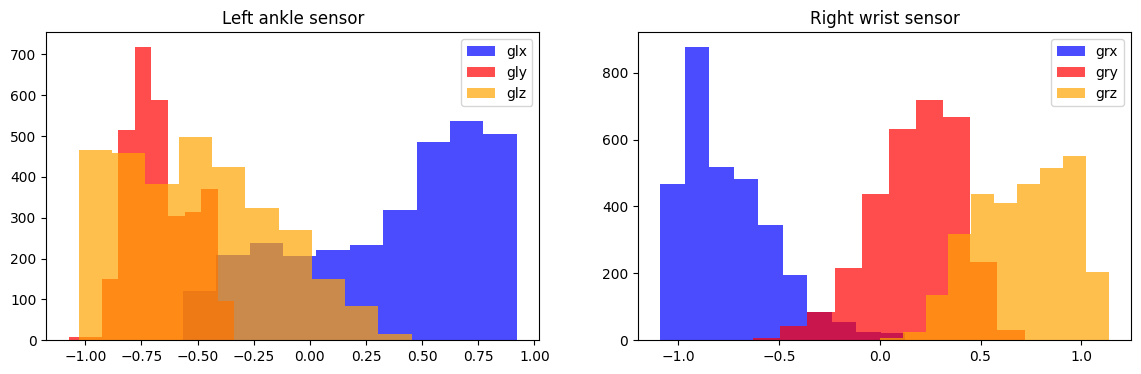

=====================Jump front & back (20x) - a==========


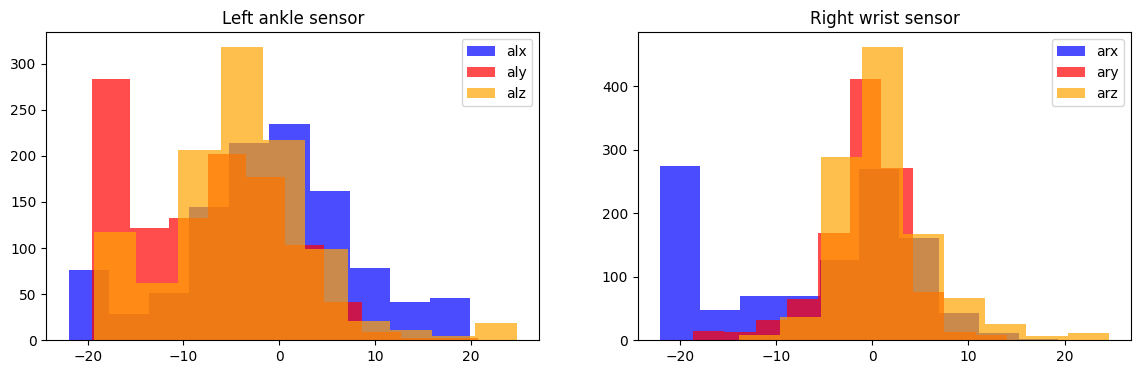

=====================Jump front & back (20x) - g==========


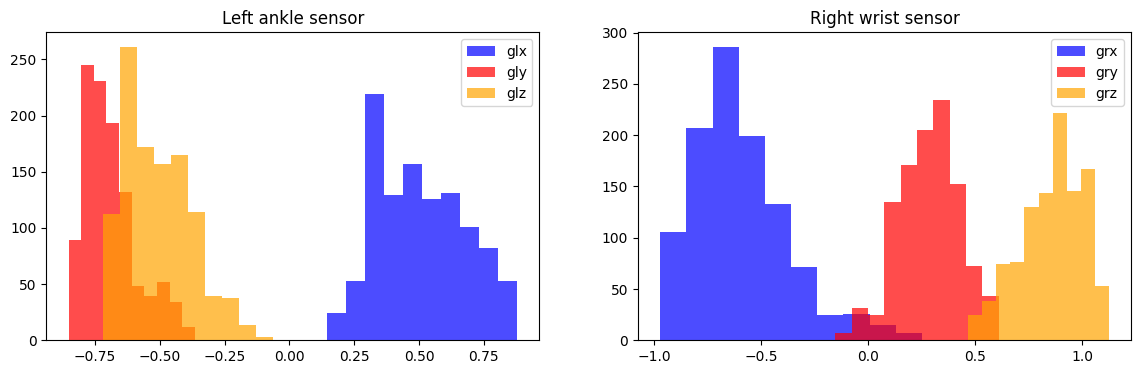

In [106]:
# Histogram : Plotting
subject1 = df[df['subject'] == 'subject1']
readings = ['a', 'g']

for i in range(1,13):
    for r in readings:
        print(f"====================={activity_label[i]} - {r}==========")
        plt.figure(figsize = (14,4))
        # Left ankle
        plt.subplot(1,2,1)
        plt.hist(subject1[subject1['Activity'] == i].reset_index(drop=True)[r + "lx"], color='blue', alpha=0.7, label=r + "lx")
        plt.hist(subject1[subject1['Activity'] == i].reset_index(drop=True)[r + "ly"], color='red', alpha=0.7, label=r + "ly")
        plt.hist(subject1[subject1['Activity'] == i].reset_index(drop=True)[r + "lz"], color='orange', alpha=0.7, label=r + "lz")
        plt.title("Left ankle sensor")
        plt.legend()
        
        # Right ankle
        plt.subplot(1,2,2)
        plt.hist(subject1[subject1['Activity'] == i].reset_index(drop=True) [r + "rx"], color = 'blue', alpha = 0.7, label = r + "rx")
        plt.hist(subject1[subject1['Activity'] == i].reset_index(drop=True) [r + "ry"], color='red', alpha=0.7, label = r + "ry")
        plt.hist(subject1[subject1['Activity'] == i].reset_index(drop=True) [r + "rz"], color = 'orange', alpha= 0.7, label = r + "rz")
        plt.title("Right wrist sensor")
        plt.legend()
        plt.show()

In [107]:
df['Activity'] = df['Activity'].replace(
    [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
    ["None",
     'Standing still (1 min)',
     'Sitting and relaxing (1 min)',
     'Lying down (1 min)',
     'Walking (1 min)',
     'Climbing stairs (1 min)',
     'Waist bends forward (20x)',
     'Frontal elevation of arms (20x)',
     'Knees bending (crouching) (20x)',
     'Cycling (1 min)',
     'Jogging (1 min)',
     'Running (1 min)',
     'Jump front & back (20x)']
)


In [108]:
df["Activity"].value_counts()

Activity
None                               40000
Standing still (1 min)             30720
Sitting and relaxing (1 min)       30720
Lying down (1 min)                 30720
Walking (1 min)                    30720
Cycling (1 min)                    30720
Jogging (1 min)                    30720
Running (1 min)                    30720
Climbing stairs (1 min)            30720
Frontal elevation of arms (20x)    29441
Knees bending (crouching) (20x)    29337
Waist bends forward (20x)          28315
Jump front & back (20x)            10342
Name: count, dtype: int64

In [109]:
df.head()

alx      aly      alz      glx       gly       glz     arx  \
97258    7.45900  -8.0370  5.21440 -0.87384 -0.080675 -0.721020 -6.5611   
1077676  0.79984  -9.8740  0.72263 -0.48237 -0.782360 -0.524560 -2.9124   
344298   3.26750  -7.7976 -4.51350 -0.27087 -0.932460 -0.009823 -4.5529   
928462   0.82125  -9.7929  0.90398 -0.59369 -0.742960 -0.216110 -6.1393   
262339   0.73380 -10.5200 -2.44570 -0.38033 -0.814260 -0.563850 -2.1488   

             ary      arz       grx      gry       grz Activity   subject  
97258   -12.8670  0.32541  0.452940 -0.94251 -0.446120     None  subject1  
1077676  -9.4643  1.56850  0.043137 -1.02050 -0.469830     None  subject9  
344298   -7.4376  3.24270 -0.570590 -0.33881  0.840520     None  subject3  
928462   -1.8773  7.27070 -0.843140 -0.32854  0.096983     None  subject8  
262339   -7.7978  1.22470 -0.719610 -0.82752  0.032328     None  subject2

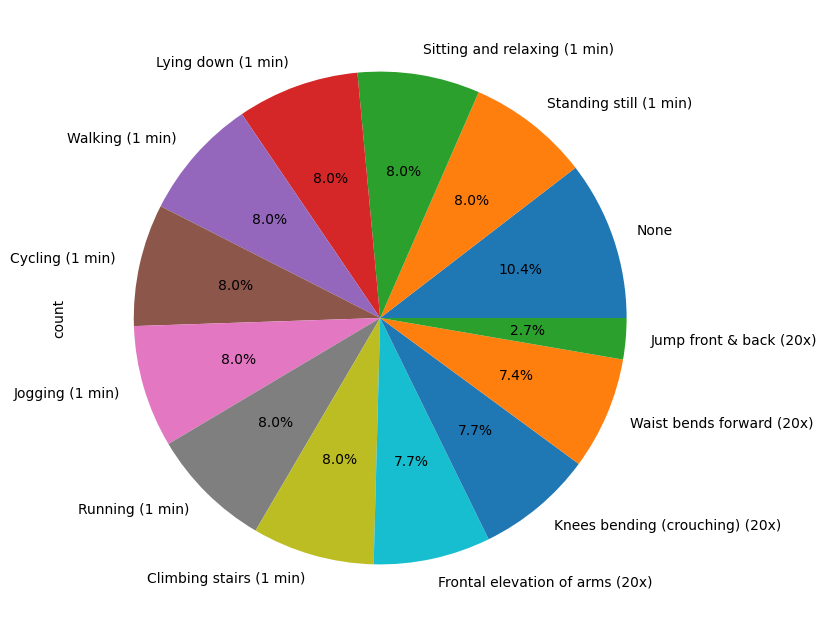

In [110]:
plt.figure(figsize=(12,8))
round(df["Activity"].value_counts()/df.shape[0]*100,2).plot.pie(autopct= '%2.1f%%')
plt.show()

In [111]:
df1= df.copy()

for feature in df1.columns[:-2]:
    lower_range = np.quantile(df[feature], 0.01)
    upper_range = np.quantile (df[feature], 0.99)
    
    print(feature, "range:", lower_range, 'to', upper_range)
    
    df1 = df1.drop(df1[(df1 [feature] >upper_range) | (df1 [feature] < lower_range)].index, axis = 0)
    print('shape', df1.shape)

alx range: -11.48606 to 19.21906
shape (375531, 14)
aly range: -19.378 to 2.371335999999999
shape (369653, 14)
alz range: -18.949 to 14.08823999999999
shape (365848, 14)
glx range: -0.75139 to 0.80891
shape (358846, 14)
gly range: -1.0675 to 0.96435
shape (352064, 14)
glz range: -1.1061 to 0.8290799999999999
shape (346403, 14)
arx range: -21.486 to 9.013924
shape (341184, 14)
ary range: -18.691 to 11.832
shape (334967, 14)
arz range: -10.259 to 11.785179999999993
shape (332282, 14)
grx range: -1.0216 to 0.95294
shape (328654, 14)
gry range: -1.1437 to 0.90965
shape (323582, 14)
grz range: -0.7069 to 1.125
shape (318924, 14)


In [112]:

df1

alx       aly      alz      glx      gly       glz      arx  \
1077676  0.79984  -9.87400  0.72263 -0.48237 -0.78236 -0.524560  -2.9124   
344298   3.26750  -7.79760 -4.51350 -0.27087 -0.93246 -0.009823  -4.5529   
928462   0.82125  -9.79290  0.90398 -0.59369 -0.74296 -0.216110  -6.1393   
262339   0.73380 -10.52000 -2.44570 -0.38033 -0.81426 -0.563850  -2.1488   
788712   3.58850  -6.58000  6.35270  0.62894 -0.69981 -0.035363  -8.8150   
...          ...       ...      ...      ...      ...       ...      ...   
1213636 -0.19979  -0.93484  2.55540  0.63080 -0.52533 -0.679760  -4.0212   
1213637 -0.33315  -1.23710 -2.91940  0.63822 -0.42777 -0.748530  -2.2515   
1213640  6.77570 -15.07500  7.39740  0.61967 -0.33771 -0.827110  -2.2797   
1213641 -2.48730 -19.23300  3.46140  0.61967 -0.33771 -0.827110  -8.2348   
1213645 -2.36980 -19.30000 -4.23870  0.71058 -0.27017 -0.754420 -21.1730   

               ary      arz       grx      gry       grz  \
1077676  -9.464300  1.56850  0.043137 -1.02050 -0.469830   
344298   -7.437600  3.24270 -0.570590 -0.33881  0.840520   
928462   -1.877300  7.27070 -0.843140 -0.32854  0.096983   
262339   -7.797800  1.22470 -0.719610 -0.82752  0.032328   
788712   -1.330600  3.94390 -0.500000 -0.61396  0.620690   
...            ...      ...       ...      ...       ...   
1213636  -0.082645  0.73545 -0.458820 -1.00000  0.122840   
1213637  -0.414790  0.52093 -0.417650 -1.03700  0.088362   
1213640  -2.358900  2.11120 -0.417650 -1.03700  0.088362   
1213641  -4.965200  2.48090 -0.437250 -1.01850  0.079741   
1213645 -14.291000 -0.13123 -0.425490 -1.03700  0.084052   

                        Activity    subject  
1077676                     None   subject9  
344298                      None   subject3  
928462                      None   subject8  
262339                      None   subject2  
788712                      None   subject7  
...                          ...        ...  
1213636  Jump front & back (20x)  subject10  
1213637  Jump front & back (20x)  subject10  
1213640  Jump front & back (20x)  subject10  
1213641  Jump front & back (20x)  subject10  
1213645  Jump front & back (20x)  subject10  

[318924 rows x 14 columns]

## 4 : Data Preprocessing 

In [113]:
le = LabelEncoder()
df["subject"] = le.fit_transform(df["subject"])


In [114]:
df

alx      aly      alz      glx       gly       glz      arx  \
97258     7.45900  -8.0370  5.21440 -0.87384 -0.080675 -0.721020  -6.5611   
1077676   0.79984  -9.8740  0.72263 -0.48237 -0.782360 -0.524560  -2.9124   
344298    3.26750  -7.7976 -4.51350 -0.27087 -0.932460 -0.009823  -4.5529   
928462    0.82125  -9.7929  0.90398 -0.59369 -0.742960 -0.216110  -6.1393   
262339    0.73380 -10.5200 -2.44570 -0.38033 -0.814260 -0.563850  -2.1488   
...           ...      ...      ...      ...       ...       ...      ...   
1213641  -2.48730 -19.2330  3.46140  0.61967 -0.337710 -0.827110  -8.2348   
1213642 -21.59100 -19.4370 -6.04190  0.61967 -0.337710 -0.827110 -21.3180   
1213643   7.54330 -19.2450 -2.66800  0.61967 -0.337710 -0.827110 -21.2970   
1213644   3.01420 -19.3340 -7.70740  0.71058 -0.270170 -0.754420 -21.1380   
1213645  -2.36980 -19.3000 -4.23870  0.71058 -0.270170 -0.754420 -21.1730   

             ary      arz       grx      gry       grz  \
97258   -12.8670  0.32541  0.452940 -0.94251 -0.446120   
1077676  -9.4643  1.56850  0.043137 -1.02050 -0.469830   
344298   -7.4376  3.24270 -0.570590 -0.33881  0.840520   
928462   -1.8773  7.27070 -0.843140 -0.32854  0.096983   
262339   -7.7978  1.22470 -0.719610 -0.82752  0.032328   
...          ...      ...       ...      ...       ...   
1213641  -4.9652  2.48090 -0.437250 -1.01850  0.079741   
1213642 -10.2130  3.65600 -0.437250 -1.01850  0.079741   
1213643 -18.7050  4.46060 -0.437250 -1.01850  0.079741   
1213644 -18.6980  1.15880 -0.425490 -1.03700  0.084052   
1213645 -14.2910 -0.13123 -0.425490 -1.03700  0.084052   

                        Activity  subject  
97258                       None        0  
1077676                     None        9  
344298                      None        3  
928462                      None        8  
262339                      None        2  
...                          ...      ...  
1213641  Jump front & back (20x)        1  
1213642  Jump front & back (20x)        1  
1213643  Jump front & back (20x)        1  
1213644  Jump front & back (20x)        1  
1213645  Jump front & back (20x)        1  

[383195 rows x 14 columns]

In [116]:
df["Activity"] = le.fit_transform(df["Activity"])

<Figure size 1000x800 with 0 Axes>

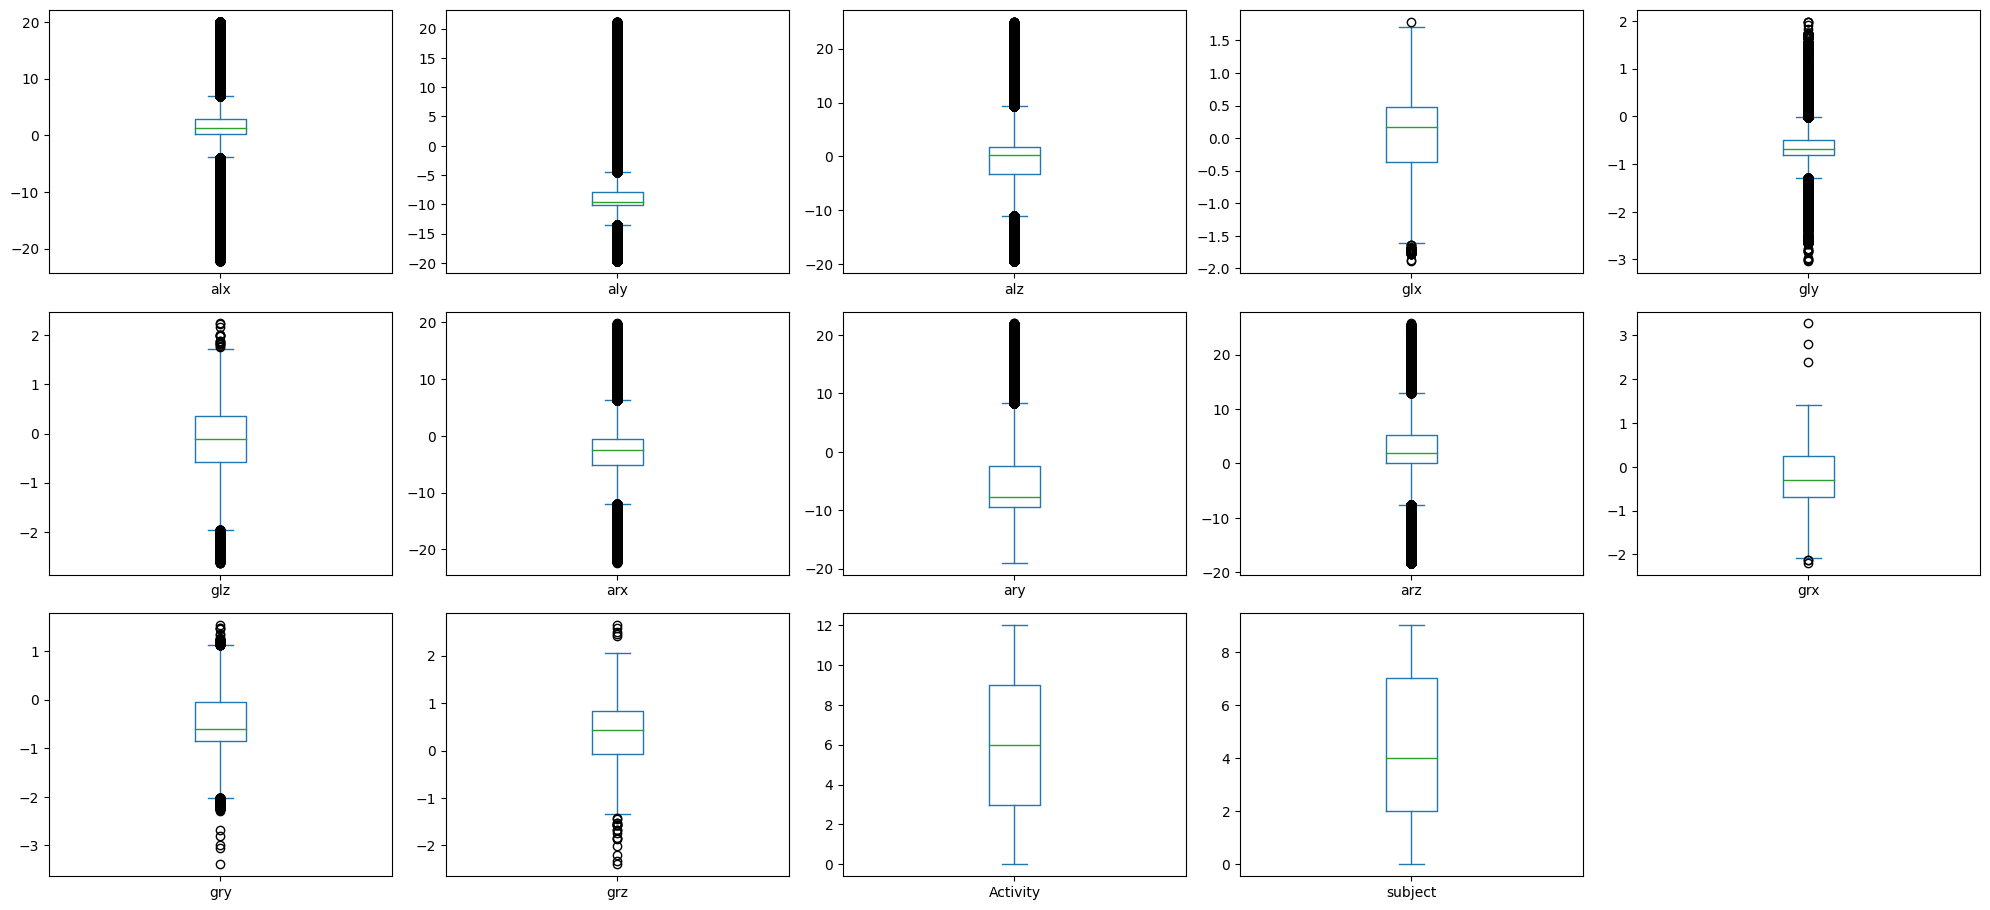

In [119]:
plt.figure(figsize = (10 , 8 ))
df.plot(kind='box', subplots=True, layout = (5,5), figsize=(20,15))
plt.tight_layout()
plt.show()

In [121]:
# X and y
X = df.drop(columns = ["Activity" , "subject"])
y = df["Activity"]


In [122]:
# Train , Test : Split 

X_train , X_test , y_train , y_test = train_test_split(X, y , test_size = 25 , random_state = 42)


In [123]:
# Robust Scaler
ro = RobustScaler()
X_train_scaled = ro.fit_transform(X_train)
X_test_scaled = ro.fit_transform(X_test)